In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import pandas as pd
import matplotlib
import xarray as xr
import cmaps
import matplotlib.ticker as mticker

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [27]:
ds = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-buoy-example2/data/CCMP_Wind_Analysis_20231220_V03.1_L4.nc')
print(ds)

<xarray.Dataset>
Dimensions:    (time: 4, latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 2023-12-20 ... 2023-12-20T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 ...
    vwnd       (time, latitude, longitude) float32 ...
    ws         (time, latitude, longitude) float32 ...
    nobs       (time, latitude, longitude) float32 ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_e

In [28]:
# 提取第三个时间点的数据
time_index = 3  # 第三个时间点的索引
uwnd = ds['uwnd'][time_index]
vwnd = ds['vwnd'][time_index]
ws = ds['ws'][time_index]

In [29]:
# 选择特定的经纬度范围
lon_range = (179.8, 230)
lat_range = (-4.2, 46)

# 选择在经纬度范围内的数据
mask_lon = (ds['longitude'] >= lon_range[0]) & (ds['longitude'] <= lon_range[1])
mask_lat = (ds['latitude'] >= lat_range[0]) & (ds['latitude'] <= lat_range[1])

uwnd = uwnd.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])
vwnd = vwnd.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])
ws = ws.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])

In [30]:
selected_u = uwnd[ 0:200, 0:200].values
selected_v = vwnd[ 0:200, 0:200].values
wind_speed = np.sqrt(selected_v**2 + selected_u**2)

# 假设你的数据维度和范围
lon = np.linspace(180, 230, 200)  # 示例经度范围
lat = np.linspace(-4, 46, 200)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

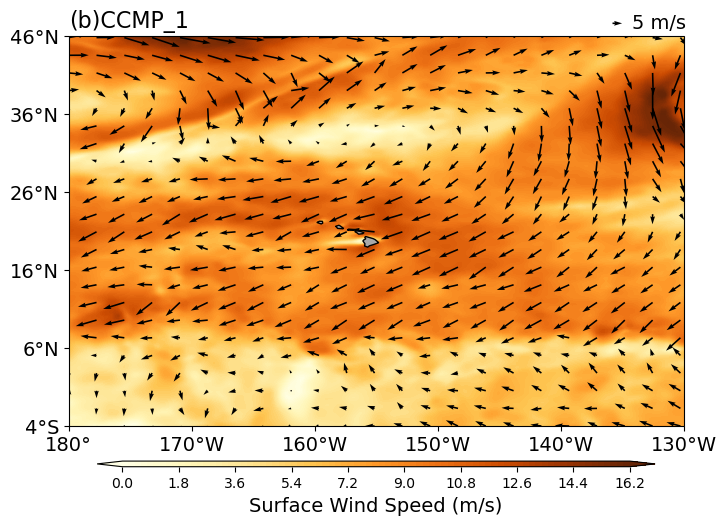

In [31]:
fig = plt.figure(figsize=(8, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([180, 230, -4, 46], crs=ccrs.PlateCarree())
# ax.set_extent([0, 20, -70, 70], crs=ccrs.PlateCarree())

# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))

contourf = plt.contourf(lon, lat, wind_speed, levels=np.arange(0, 16.4, 0.2),transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.07, shrink=0.9, aspect=90)
quiver = plt.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],transform=ccrs.PlateCarree())



# 添加 5 m/s 的风速标注
qk = plt.quiverkey(quiver, X=0.82, Y=0.899, U=5, label='5 m/s', labelpos='E', coordinates='figure', )
qk.text.set_fontsize(14)  # 更改风速标注的字体大小
# 给色标命名
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 添加陆地和海洋，设置颜色
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='darkgrey', zorder=2)
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=0)
 

# 定义网格的间隔
lon_ticks = range(-0, 51, 10)   # 90E 到 300E，每30度一个网格
lat_ticks = range(-4, 47, 10)   # -60 到 70，每30度一个网格
# 使用 matplotlib 设置刻度线
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
# 设置刻度线标签样式并显示大小
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 设置经纬度标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.text(159.7, -2.3, 'Ⅴ', fontsize=17, color='black', fontname='Times New Roman', fontweight='bold',verticalalignment='bottom', horizontalalignment='left')

# plt.legend()
# plt.legend()
plt.title('(b)CCMP_1',fontsize = 16,loc='left')
ax.set_aspect(0.635)
plt.savefig('E:/PINN2/fig4/bccmp.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/PINN_ResND-CCMP.png',bbox_inches='tight')
plt.show()

In [16]:
data = xr.open_dataset(r'C:/Users/br_bo/Desktop/PINN_example2/whole2023-12-20/data/cmems_obs-wind_glo_phy_nrt_l3-hy2d-hscat-des-0.25deg_P1D-i_1737010693738.nc', decode_times=False)
print(data)

<xarray.Dataset>
Dimensions:           (time: 1, latitude: 200, longitude: 200)
Coordinates:
  * time              (time) float64 1.703e+09
  * latitude          (latitude) float32 -3.875 -3.625 -3.375 ... 45.62 45.88
  * longitude         (longitude) float32 -179.9 -179.6 -179.4 ... -130.4 -130.1
Data variables:
    eastward_wind     (time, latitude, longitude) float32 ...
    measurement_time  (time, latitude, longitude) float32 ...
    northward_wind    (time, latitude, longitude) float32 ...
    wind_speed        (time, latitude, longitude) float32 ...
    wind_to_dir       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global Ocean - Wind - HY-2D HSCAT - 25km daily Descend...
    institution:       EUMETSAT/OSI SAF/KNMI
    source:            HY-2D HSCAT
    history:           N/A
    references:        HY-2 Wind Product User Manual, https://osi-saf.eumetsa...
    comment:           Orbit period and inclination are constan

In [17]:
U_star = data['eastward_wind'] # T*L*X*Y N x T
V_star = data['northward_wind']
data1 = U_star.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_data1 = data1.reshape((200, 200))
# v
data2 = V_star.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_data2 = data2.reshape((200, 200))

In [18]:
# 假设你的数据维度和范围
lon = np.linspace(180, 230, 200)  # 示例经度范围
lat = np.linspace(-4, 46, 200)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
selected_u = reshaped_data1[ :, :]
selected_v = reshaped_data2[ :, :]
wind_speed_obs = np.sqrt(selected_v**2 + selected_u**2)

In [19]:
wind_error = wind_speed-wind_speed_obs

In [22]:
# 计算差值的平方
squared_error = (wind_speed-wind_speed_obs) ** 2

# 计算均方误差（MSE）
mse = np.nanmean(squared_error)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

In [23]:
import matplotlib.ticker as mticker
import matplotlib.patches as patches

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


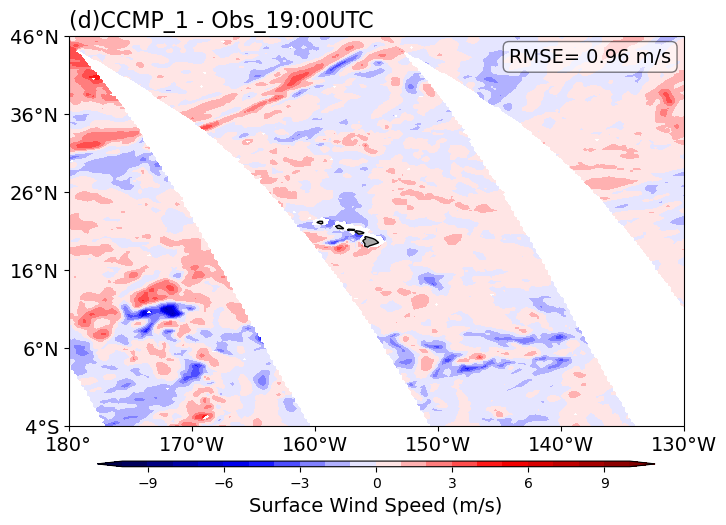

In [25]:
fig = plt.figure(figsize=(8, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([180, 230, -4, 46], crs=ccrs.PlateCarree())
# ax.set_extent([0, 20, -70, 70], crs=ccrs.PlateCarree())

# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))

# rect1 = patches.Rectangle((-29.8,-14.5), 15, 12, linewidth=2, linestyle = '--', edgecolor='black', facecolor='none')
# rect2 = patches.Rectangle((-27.8,1.8), 5, 7, linewidth=2, linestyle = '--', edgecolor='black', facecolor='none')
# rect3 = patches.Rectangle((1,0), 13.5, 4, linewidth=2, linestyle = '--', edgecolor='black', facecolor='none')
contourf = plt.contourf(lon, lat, wind_error[:,:], levels=np.arange(-10, 10.1, 1), transform=ccrs.PlateCarree(),extend='both', cmap='seismic')
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.07, shrink=0.9, aspect=90)
# plt.gca().add_patch(rect1)
# plt.gca().add_patch(rect2)
# plt.gca().add_patch(rect3)


# # 添加 5 m/s 的风速标注
# qk = plt.quiverkey(quiver, X=0.82, Y=0.899, U=5, label='5 m/s', labelpos='E', coordinates='figure', )
# qk.text.set_fontsize(14)  # 更改风速标注的字体大小
# 给色标命名
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 添加陆地和海洋，设置颜色
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='darkgrey', zorder=2)
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=0)
 

# 定义网格的间隔
lon_ticks = range(-0, 51, 10)   # 90E 到 300E，每30度一个网格
lat_ticks = range(-4, 47, 10)   # -60 到 70，每30度一个网格
# 使用 matplotlib 设置刻度线
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
# 设置刻度线标签样式并显示大小
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 设置经纬度标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.text(159.7, -2.3, 'Ⅴ', fontsize=17, color='black', fontname='Times New Roman', fontweight='bold',verticalalignment='bottom', horizontalalignment='left')

# plt.legend()
# plt.legend()
# 添加 RMSE 标注
plt.text(0.98, 0.97, f'RMSE= {rmse:.2f} m/s', 
         transform=plt.gca().transAxes, fontsize=14, 
         color='black', verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round'))
plt.title('(d)CCMP_1 - Obs_19:00UTC',fontsize = 16,loc='left')

ax.set_aspect(0.635)
plt.savefig('E:/PINN2/fig4/dccmp-obs.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/PINN_ResND-CCMP.png',bbox_inches='tight')

# plt.savefig('E:/PINN_final/GRL/2/eCCMP-Obs_10UTC.eps',format='eps',bbox_inches='tight')

# plt.savefig('E:/PINN_final/part2/3/dccmp-obs.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/PINN_ResND-CCMP.png',bbox_inches='tight')
plt.show()